<a href="https://colab.research.google.com/github/Dharil33/Anomaly-Detection-with-Local-Outlier-Factor-LOF-/blob/main/Anomaly_Detection_with_Local_Outlier_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Local Outlier Factor**

The Local Outlier Factor is an algorithm to detect anomalies in observation data. Measuring the local density score of each sample and weighting their scores are the main concept of the algorithm. By comparing the score of the sample to its neighbors, the algorithm defines the lower density elements as anomalies in data.

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such information is generally not available, and taking n_neighbors=20 appears to work well in general.

One of the main challenges with Anomaly detection is the lack of training data specifying examples of anomalies to train models for predicting them. LOF is an unsupervised technique that does not require prior examples.
Several of the simple distance based models for anomaly detection fail when the data has different density in different regions. i.e there are areas where points are close together and areas where points are spread out in the dataset. The LOF method can handle such situations

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("/content/student_info.csv")
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [43]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

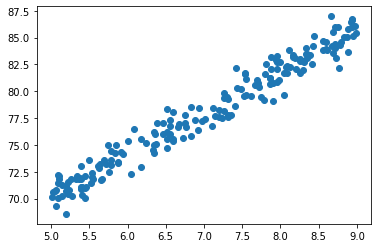

In [41]:
plt.scatter(df['study_hours'],df['student_marks'])
plt.show()

In [46]:
from sklearn.neighbors import LocalOutlierFactor
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
y_pred = model1.fit_predict(df)
outlier_index = np.where(y_pred == -1) 

In [47]:
outlier_index

(array([ 93,  94,  95, 120]),)

In [48]:
outlier_values = df.iloc[outlier_index]

In [49]:
outlier_values

,study_hours,student_marks
95,6.09,76.48
97,5.20,68.57
98,8.88,83.64
124,8.69,83.57


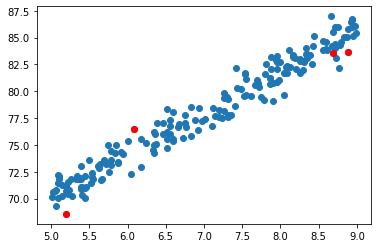

In [52]:
plt.scatter(df['study_hours'],df['student_marks'])
plt.scatter(outlier_values['study_hours'], outlier_values["student_marks"], color = "r")
plt.show()